<a href="https://colab.research.google.com/github/Axel02leon/Intro-to-Machine-Learning-/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Problem 1***

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = "https://raw.githubusercontent.com/Axel02leon/Intro-to-Machine-Learning-/main/D3.csv"
df = pd.read_csv(dataset)
df.head()

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [106]:
# define each value input/output value using aaray's
x1 = df.values[:,0]
x2 = df.values[:,1]
x3 = df.values[:,2]
y = df.values[:,3]
# total amount of training
m = len(y)

print('x1 = ', x1[: 5])
print('x2 = ', x2[: 5])
print('x3 = ', x3[: 5])
print('y = ', y[: 5])
print('m = ', m)


x1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
x2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
x3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100


In [107]:
print('x1 = ', x1[: 100])
print('x2 = ', x2[: 100])
print('x3 = ', x3[: 100])
print('y = ', y[: 100])

x1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616 0.2020202
 0.24242424 0.28282828 0.32323232 0.36363636 0.4040404  0.44444444
 0.48484848 0.52525252 0.56565657 0.60606061 0.64646465 0.68686869
 0.72727273 0.76767677 0.80808081 0.84848485 0.88888889 0.92929293
 0.96969697 1.01010101 1.05050505 1.09090909 1.13131313 1.17171717
 1.21212121 1.25252525 1.29292929 1.33333333 1.37373737 1.41414141
 1.45454546 1.49494949 1.53535354 1.57575758 1.61616162 1.65656566
 1.6969697  1.73737374 1.77777778 1.81818182 1.85858586 1.8989899
 1.93939394 1.97979798 2.02020202 2.06060606 2.1010101  2.14141414
 2.18181818 2.22222222 2.26262626 2.3030303  2.34343434 2.38383838
 2.42424242 2.46464646 2.5050505  2.54545455 2.58585859 2.62626263
 2.66666667 2.70707071 2.74747475 2.78787879 2.82828283 2.86868687
 2.90909091 2.94949495 2.98989899 3.03030303 3.07070707 3.11111111
 3.15151515 3.19191919 3.23232323 3.27272727 3.31313131 3.35353535
 3.39393939 3.43434343 3.47474748 3.51515151 3.55555556 3.

In [108]:
#creating a vector
x_0 = np.ones((m,1))
x_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [109]:
# Reshape x1, x2, and x3 to ensure they are column vectors (m rows, 1 column)
x_1 = x1.reshape(m,1)
x_2 = x2.reshape(m,1)
x_3 = x3.reshape(m,1)
# Resulting in an m x 2 matrix: the first column is all ones, the second column is the feature x1, x2, x3
data_1 = np.hstack((x_0,x_1))
data_2 = np.hstack((x_0,x_2))
data_3 = np.hstack((x_0,x_3))
#number of iterations for gradient descent, including the three different alpha's for experimentation
iterations = 1500
alpha_1 = 0.1
alpha_2 = 0.01
alpha_3 = 0.07
theta = np.zeros(2)

In [110]:
def compute_cost(X, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [111]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [112]:
# The function gradient_descent updates theta and returns the final values of theta
# and the history of the cost (loss) for each iteration.
theta = np.zeros(2) # Reset theta to zeros again to repeat the experiment with the third learning rate (alpha_1,2,3).
theta_1_1, cost_history_1_1 = gradient_descent(data_1, y, theta, alpha_1, iterations)
theta = np.zeros(2)
theta_1_2, cost_history_1_2 = gradient_descent(data_1, y, theta, alpha_2, iterations)
theta = np.zeros(2)
theta_1_3, cost_history_1_3 = gradient_descent(data_1, y, theta, alpha_3, iterations)

print('Final value of theta =', theta_1_1)
print('cost_history =', cost_history_1_1)

Final value of theta = [ 5.92794892 -2.03833663]
cost_history = [5.16999006 4.96338989 4.7855721  ... 0.98499308 0.98499308 0.98499308]


In [113]:
theta = np.zeros(2)
theta_2_1, cost_history_2_1 = gradient_descent(data_2, y, theta, alpha_1, iterations)
theta = np.zeros(2)
theta_2_2, cost_history_2_2 = gradient_descent(data_2, y, theta, alpha_2, iterations)
theta = np.zeros(2)
theta_2_3, cost_history_2_3 = gradient_descent(data_2, y, theta, alpha_3, iterations)

print('Final value of theta =', theta_2_1)
print('cost_history =', cost_history_2_1)

Final value of theta = [0.73606043 0.55760761]
cost_history = [3.90731819 3.66528504 3.62832072 ... 3.59936602 3.59936602 3.59936602]


In [114]:
theta = np.zeros(2)
theta_3_1, cost_history_3_1 = gradient_descent(data_3, y, theta, alpha_1, iterations)
theta = np.zeros(2)
theta_3_2, cost_history_3_2 = gradient_descent(data_3, y, theta, alpha_2, iterations)
theta = np.zeros(2)
theta_3_3, cost_history_3_3 = gradient_descent(data_3, y, theta, alpha_3, iterations)

print('Final value of theta =', theta_3_1)
print('cost_history =', cost_history_3_1)

Final value of theta = [ 2.8714221  -0.52048288]
cost_history = [4.66843939 4.49602325 4.43685075 ... 3.62945112 3.62945112 3.62945112]


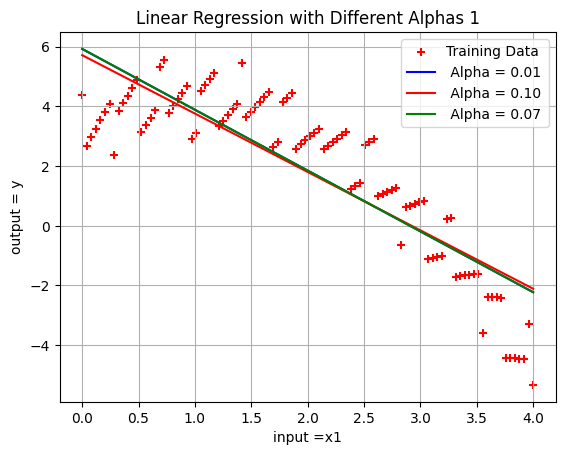

In [115]:
#Plotting Linear Regression for x1
plt.scatter(data_1[:,1], y, color="red", marker="+")
plt.plot(data_1[:,1],data_1.dot(theta_1_1), color="blue")
plt.plot(data_1[:,1],data_1.dot(theta_1_2), color="red")
plt.plot(data_1[:,1],data_1.dot(theta_1_3), color="green")
plt.legend(["Training Data "," Alpha = 0.01"," Alpha = 0.10"," Alpha = 0.07"])
plt.xlabel('input =x1')
plt.ylabel('output = y')
plt.title('Linear Regression with Different Alphas 1')
plt.grid(True)





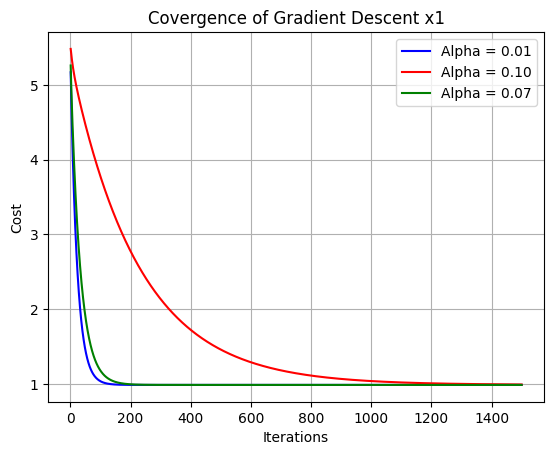

In [116]:
#Plotting Gradient Descent x1
plt.plot(range(1, iterations + 1), cost_history_1_1, color='blue')
plt.plot(range(1, iterations + 1), cost_history_1_2, color='red')
plt.plot(range(1, iterations + 1), cost_history_1_3, color='green')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Covergence of Gradient Descent x1')
plt.legend(['Alpha = 0.01', 'Alpha = 0.10', 'Alpha = 0.07'])



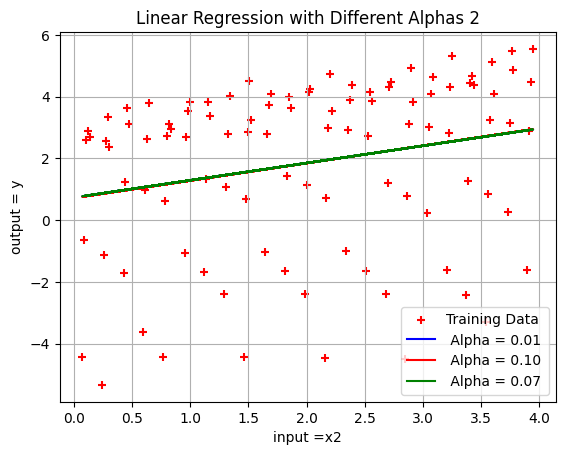

In [117]:
#Plotting Linear Regression for x2
plt.scatter(data_2[:,1], y, color="red", marker="+")
plt.plot(data_2[:,1],data_2.dot(theta_2_1), color="blue")
plt.plot(data_2[:,1],data_2.dot(theta_2_2), color="red")
plt.plot(data_2[:,1],data_2.dot(theta_2_3), color="green")
plt.legend(["Training Data "," Alpha = 0.01"," Alpha = 0.10"," Alpha = 0.07"])
plt.xlabel('input =x2')
plt.ylabel('output = y')
plt.title('Linear Regression with Different Alphas 2')
plt.grid(True)



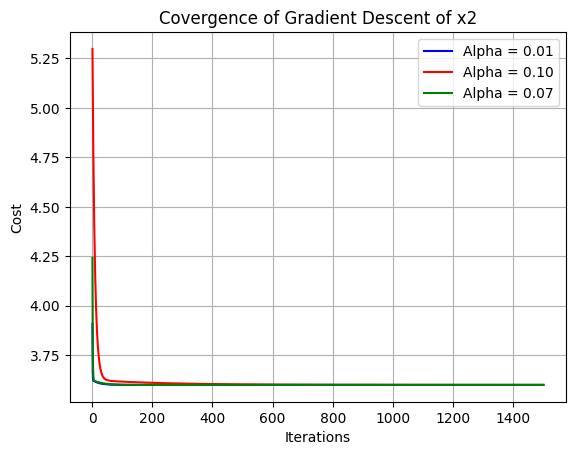

In [118]:
#Plotting Gradient Descent of x2
plt.plot(range(1, iterations + 1), cost_history_2_1, color='blue')
plt.plot(range(1, iterations + 1), cost_history_2_2, color='red')
plt.plot(range(1, iterations + 1), cost_history_2_3, color='green')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Covergence of Gradient Descent of x2')
plt.legend(['Alpha = 0.01', 'Alpha = 0.10', 'Alpha = 0.07'])

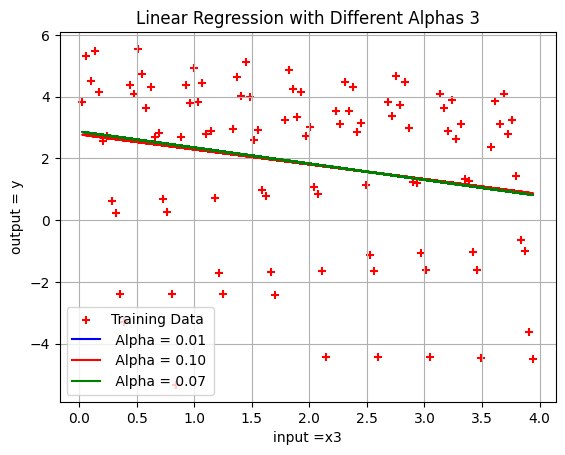

In [119]:
#Plotting Linear Regression for x3
plt.scatter(data_3[:,1], y, color="red", marker="+")
plt.plot(data_3[:,1],data_3.dot(theta_3_1), color="blue" )
plt.plot(data_3[:,1],data_3.dot(theta_3_2), color="red" )
plt.plot(data_3[:,1],data_3.dot(theta_3_3), color="green" )
plt.legend(["Training Data "," Alpha = 0.01"," Alpha = 0.10"," Alpha = 0.07"])
plt.xlabel('input =x3')
plt.ylabel('output = y')
plt.title('Linear Regression with Different Alphas 3')
plt.grid(True)



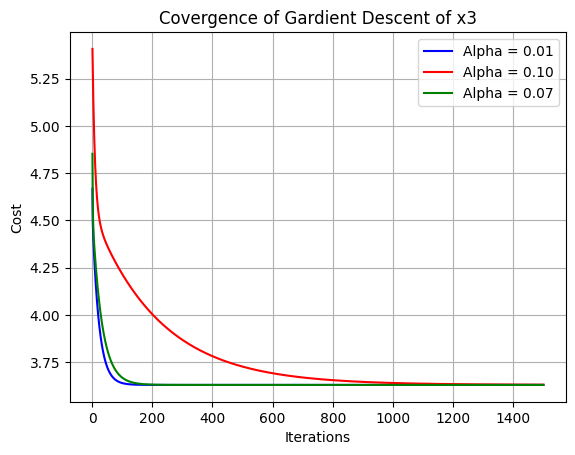

In [120]:
#Plotting Gradient Descent of x3
plt.plot(range(1, iterations + 1), cost_history_3_1, color='blue')
plt.plot(range(1, iterations + 1), cost_history_3_2, color='red')
plt.plot(range(1, iterations + 1), cost_history_3_3, color='green')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Covergence of Gardient Descent of x3')
plt.legend(['Alpha = 0.01', 'Alpha = 0.10', 'Alpha = 0.07'])

### ***Problem 2***

In [121]:
# Combine all features (x1, x2, x3) and the bias term (x_0) into one dataset
# x_0 is the bias column (all ones), and x1, x2, x3 are the feature columns.
# np.hstack stacks the arrays horizontally (side-by-side) to form a matrix
datatotal = np.hstack((x_0,x1.reshape(m,1),x2.reshape(m,1),x3.reshape(m,1)))
datatotal[:5]

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [122]:
theta = np.zeros(4)

#Recreating New iteration and alpha for Problem 2, including a new theta to reset back to zeros
iteration = 1500
alpha_2_1 = 0.02
alpha_2_2 = 0.06
alpha_2_3 = 0.10

theta

array([0., 0., 0., 0.])

In [123]:
def compute_cost( X, Y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [124]:
# The function gradient_descent updates theta and returns the final values of theta
# and the history of the cost (loss) for each iteration.
theta = np.zeros(4)
thetaT_1, total_cost_history_1 = gradient_descent(datatotal, y, theta, alpha_2_1, iteration)
theta = np.zeros(4)
thetaT_2, total_cost_history_2 = gradient_descent(datatotal, y, theta, alpha_2_2, iteration)
theta = np.zeros(4)
thetaT_3, total_cost_history_3 = gradient_descent(datatotal, y, theta, alpha_2_3, iteration)
print('Final value of theta =', thetaT)
print('cost_history =', total_cost_history)

Final value of theta = [ 5.31416717 -2.00371927  0.53256334 -0.26560187]
cost_history = [0.73846424 0.73846424 0.73846424 ... 0.73846424 0.73846424 0.73846424]


Text(0.5, 1.0, 'Covergence of Gradient Descent')

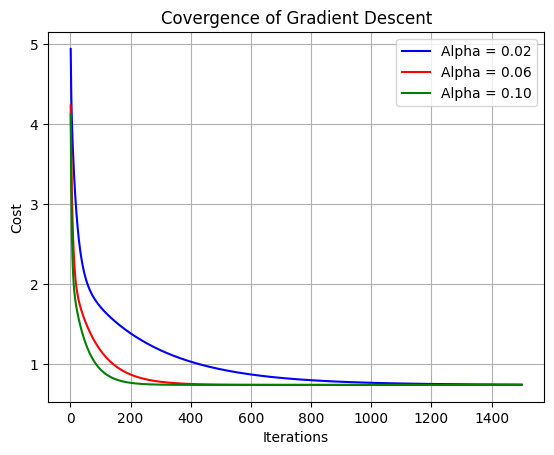

In [125]:
#Plotting new Gradient Descent with new alpha's
plt.plot(range(1, iteration + 1), total_cost_history_1, color='blue')
plt.plot(range(1, iteration + 1), total_cost_history_2, color='red')
plt.plot(range(1, iteration + 1), total_cost_history_3, color='green')
plt.legend(['Alpha = 0.02', 'Alpha = 0.06', 'Alpha = 0.10'])
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Covergence of Gradient Descent')

In [126]:
# theta is a list or array with the learned coefficients
# Manually compute the preidcted values for new inputs
theta = np.array(thetaT)

y1 = theta[0] + theta[1]*1 + theta[2]*1 + theta[3]*1
y2 = theta[0] + theta[1]*2 + theta[2]*0 + theta[3]*4
y3 = theta[0] + theta[1]*3 + theta[2]*2 + theta[3]*1

print('Predicted y value for (1, 1, 1):', y1)
print('Predicted y value for (2, 0, 4):', y2)
print('Predicted y value for (3, 2, 1):', y3)


Predicted y value for (1, 1, 1): 3.5774093742928352
Predicted y value for (2, 0, 4): 0.24432117283477806
Predicted y value for (3, 2, 1): 0.10253417289132655
